In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\ratho\AppData\Local\Packages\5319275A.WhatsAppDesktop_cv1g1gvanyjgm\LocalState\sessions\CB7DB44B5A8C125E3A03FBD363E0B2E3D25ABFAC\transfers\2026-04\99acres_desc (1).csv")

In [3]:
df

,name,location,description,rate_per_sqft,area_in_sqft,area_type,property_title,property_type,bhk_type,price_in_cr
0,swarnim sentossa,swarnim sentossa,let your dream of owning a flat come true with...,5009.0,2250.0,super,swarnim sentossa,flat,3,NaN
1,scarlet springs,scarlet springs,"scarlet springs is a residential project, offe...",4377.0,1674.0,super,scarlet springs,flat,3,0.73
2,suryansh sanidhya shivalaya,"sarkhej, sarkhej okaf, ahmedabad",suryansh sanidhya shivalaya society now offers...,3931.0,1080.0,super,suryansh sanidhya shivalaya,flat,2,0.42
3,siddhi terrace skyline,memnagar,"siddhi terrace skyline, one of the known housi...",7198.0,2320.0,super,siddhi terrace skyline,flat,3,1.67
4,aadhya arambh,"ghatlodia, ahmedabad","beautiful 3,4 bhk apartments in ghatlodia, are...",NaN,1604.0,carpet,aadhya arambh,flat,4,NaN
...,...,...,...,...,...,...,...,...,...,...
20055,z luxuria,z luxuria,z luxuria is a project by zade group in ahmeda...,17962.0,5400.0,super,z luxuria,flat,7,NaN
20056,hn riviera bliss,"insouth bopal, ahmedabad","hn riviera bliss, one of the known housing soc...",NaN,3121.0,carpet,hn riviera bliss,flat,5,NaN
20057,highline by ag group,"insola, ahmedabad","beautiful 3,4,5 bhk apartments in sola, are no...",NaN,10920.0,super,highline by ag group,flat,5,NaN
20058,goyal riviera prestige,"inmakarba, sg highway","beautiful 3,4,5 bhk apartments in makarba, are...",NaN,2879.0,carpet,goyal riviera prestige,flat,5,NaN


In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.shape

(20060, 10)

In [6]:
df.columns

Index(['name', 'location', 'description', 'rate_per_sqft', 'area_in_sqft',
       'area_type', 'property_title', 'property_type', 'bhk_type',
       'price_in_cr'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20060 entries, 0 to 20059
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            19950 non-null  object 
 1   location        19765 non-null  object 
 2   description     20045 non-null  object 
 3   rate_per_sqft   19701 non-null  float64
 4   area_in_sqft    20036 non-null  float64
 5   area_type       20060 non-null  object 
 6   property_title  19949 non-null  object 
 7   property_type   20060 non-null  object 
 8   bhk_type        20060 non-null  int64  
 9   price_in_cr     19332 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.5+ MB


In [8]:
df.describe()

,rate_per_sqft,area_in_sqft,bhk_type,price_in_cr
count,1.970100e+04,2.003600e+04,20060.000000,19332.000000
mean,1.375771e+04,3.123944e+03,2.903988,1.462783
std,2.134984e+05,7.027497e+04,1.207127,2.100932
min,0.000000e+00,1.000000e+00,1.000000,0.010000
25%,4.620000e+03,1.000000e+03,2.000000,0.550000
50%,6.153000e+03,1.500000e+03,3.000000,0.850000
75%,8.860000e+03,2.169000e+03,3.000000,1.550000
max,1.500000e+07,6.534000e+06,45.000000,120.000000


In [9]:
df.drop(["name"], axis = 1, inplace = True)

In [10]:
df

,location,description,rate_per_sqft,area_in_sqft,area_type,property_title,property_type,bhk_type,price_in_cr
0,swarnim sentossa,let your dream of owning a flat come true with...,5009.0,2250.0,super,swarnim sentossa,flat,3,NaN
1,scarlet springs,"scarlet springs is a residential project, offe...",4377.0,1674.0,super,scarlet springs,flat,3,0.73
2,"sarkhej, sarkhej okaf, ahmedabad",suryansh sanidhya shivalaya society now offers...,3931.0,1080.0,super,suryansh sanidhya shivalaya,flat,2,0.42
3,memnagar,"siddhi terrace skyline, one of the known housi...",7198.0,2320.0,super,siddhi terrace skyline,flat,3,1.67
4,"ghatlodia, ahmedabad","beautiful 3,4 bhk apartments in ghatlodia, are...",NaN,1604.0,carpet,aadhya arambh,flat,4,NaN
...,...,...,...,...,...,...,...,...,...
20055,z luxuria,z luxuria is a project by zade group in ahmeda...,17962.0,5400.0,super,z luxuria,flat,7,NaN
20056,"insouth bopal, ahmedabad","hn riviera bliss, one of the known housing soc...",NaN,3121.0,carpet,hn riviera bliss,flat,5,NaN
20057,"insola, ahmedabad","beautiful 3,4,5 bhk apartments in sola, are no...",NaN,10920.0,super,highline by ag group,flat,5,NaN
20058,"inmakarba, sg highway","beautiful 3,4,5 bhk apartments in makarba, are...",NaN,2879.0,carpet,goyal riviera prestige,flat,5,NaN


In [11]:
df.isnull().sum()

location          295
description        15
rate_per_sqft     359
area_in_sqft       24
area_type           0
property_title    111
property_type       0
bhk_type            0
price_in_cr       728
dtype: int64

In [12]:
def extract_price(text):
    if pd.isnull(text):
        return None

    text = text.lower()

    # crore
    cr_match = re.search(r'(\d+\.?\d*)\s*cr', text)
    if cr_match:
        return float(cr_match.group(1))

    # lakh / lac
    lakh_match = re.search(r'(\d+\.?\d*)\s*(lakh|lac)', text)
    if lakh_match:
        return float(lakh_match.group(1)) / 100  # lakh to crore

    return None


In [13]:
df['price_from_desc'] = df['description'].apply(extract_price)


In [14]:
df['price_in_cr'] = df['price_in_cr'].fillna(df['price_from_desc'])


In [15]:
df.drop(columns=['price_from_desc'], inplace=True)


In [16]:
df.isnull().sum()

location          295
description        15
rate_per_sqft     359
area_in_sqft       24
area_type           0
property_title    111
property_type       0
bhk_type            0
price_in_cr       404
dtype: int64

In [17]:
df['price_in_cr'] = df.groupby(
    ['location', 'bhk_type']
)['price_in_cr'].transform(
    lambda x: x.fillna(x.median())
)


C:\Users\ratho\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ratho\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ratho\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ratho\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ratho\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,

In [18]:
df

,location,description,rate_per_sqft,area_in_sqft,area_type,property_title,property_type,bhk_type,price_in_cr
0,swarnim sentossa,let your dream of owning a flat come true with...,5009.0,2250.0,super,swarnim sentossa,flat,3,1.03
1,scarlet springs,"scarlet springs is a residential project, offe...",4377.0,1674.0,super,scarlet springs,flat,3,0.73
2,"sarkhej, sarkhej okaf, ahmedabad",suryansh sanidhya shivalaya society now offers...,3931.0,1080.0,super,suryansh sanidhya shivalaya,flat,2,0.42
3,memnagar,"siddhi terrace skyline, one of the known housi...",7198.0,2320.0,super,siddhi terrace skyline,flat,3,1.67
4,"ghatlodia, ahmedabad","beautiful 3,4 bhk apartments in ghatlodia, are...",NaN,1604.0,carpet,aadhya arambh,flat,4,1.62
...,...,...,...,...,...,...,...,...,...
20055,z luxuria,z luxuria is a project by zade group in ahmeda...,17962.0,5400.0,super,z luxuria,flat,7,NaN
20056,"insouth bopal, ahmedabad","hn riviera bliss, one of the known housing soc...",NaN,3121.0,carpet,hn riviera bliss,flat,5,4.28
20057,"insola, ahmedabad","beautiful 3,4,5 bhk apartments in sola, are no...",NaN,10920.0,super,highline by ag group,flat,5,4.53
20058,"inmakarba, sg highway","beautiful 3,4,5 bhk apartments in makarba, are...",NaN,2879.0,carpet,goyal riviera prestige,flat,5,2.10


In [19]:
df['price_in_cr'].fillna(df['price_in_cr'].median(), inplace=True)


C:\Users\ratho\AppData\Local\Temp\ipykernel_5396\3180200188.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_in_cr'].fillna(df['price_in_cr'].median(), inplace=True)


In [20]:
df.isnull().sum()


location          295
description        15
rate_per_sqft     359
area_in_sqft       24
area_type           0
property_title    111
property_type       0
bhk_type            0
price_in_cr         0
dtype: int64

In [21]:
df['rate_per_sqft'].fillna(df['rate_per_sqft'].median(), inplace=True)


C:\Users\ratho\AppData\Local\Temp\ipykernel_5396\783511365.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate_per_sqft'].fillna(df['rate_per_sqft'].median(), inplace=True)


In [22]:
df.isnull().sum()

location          295
description        15
rate_per_sqft       0
area_in_sqft       24
area_type           0
property_title    111
property_type       0
bhk_type            0
price_in_cr         0
dtype: int64

In [23]:
df['area_in_sqft'].fillna(df['area_in_sqft'].median(), inplace=True)


C:\Users\ratho\AppData\Local\Temp\ipykernel_5396\4067546379.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['area_in_sqft'].fillna(df['area_in_sqft'].median(), inplace=True)


In [24]:
df.isnull().sum()

location          295
description        15
rate_per_sqft       0
area_in_sqft        0
area_type           0
property_title    111
property_type       0
bhk_type            0
price_in_cr         0
dtype: int64

In [25]:
df

,location,description,rate_per_sqft,area_in_sqft,area_type,property_title,property_type,bhk_type,price_in_cr
0,swarnim sentossa,let your dream of owning a flat come true with...,5009.0,2250.0,super,swarnim sentossa,flat,3,1.03
1,scarlet springs,"scarlet springs is a residential project, offe...",4377.0,1674.0,super,scarlet springs,flat,3,0.73
2,"sarkhej, sarkhej okaf, ahmedabad",suryansh sanidhya shivalaya society now offers...,3931.0,1080.0,super,suryansh sanidhya shivalaya,flat,2,0.42
3,memnagar,"siddhi terrace skyline, one of the known housi...",7198.0,2320.0,super,siddhi terrace skyline,flat,3,1.67
4,"ghatlodia, ahmedabad","beautiful 3,4 bhk apartments in ghatlodia, are...",6153.0,1604.0,carpet,aadhya arambh,flat,4,1.62
...,...,...,...,...,...,...,...,...,...
20055,z luxuria,z luxuria is a project by zade group in ahmeda...,17962.0,5400.0,super,z luxuria,flat,7,0.85
20056,"insouth bopal, ahmedabad","hn riviera bliss, one of the known housing soc...",6153.0,3121.0,carpet,hn riviera bliss,flat,5,4.28
20057,"insola, ahmedabad","beautiful 3,4,5 bhk apartments in sola, are no...",6153.0,10920.0,super,highline by ag group,flat,5,4.53
20058,"inmakarba, sg highway","beautiful 3,4,5 bhk apartments in makarba, are...",6153.0,2879.0,carpet,goyal riviera prestige,flat,5,2.10


In [26]:
df["location"] = df["location"].fillna(df["property_title"])

In [27]:
df.isnull().sum()

location            9
description        15
rate_per_sqft       0
area_in_sqft        0
area_type           0
property_title    111
property_type       0
bhk_type            0
price_in_cr         0
dtype: int64

In [28]:
df["property_title"] = df["property_title"].fillna(df["location"])


In [29]:
df.isnull().sum()

location           9
description       15
rate_per_sqft      0
area_in_sqft       0
area_type          0
property_title     9
property_type      0
bhk_type           0
price_in_cr        0
dtype: int64

In [30]:
df[df.isnull().any(axis=1)]

,location,description,rate_per_sqft,area_in_sqft,area_type,property_title,property_type,bhk_type,price_in_cr
3225,NaN,NaN,12500.0,11400.0,super,NaN,flat,5,0.850
3227,NaN,NaN,12500.0,16400.0,super,NaN,flat,5,0.850
3278,NaN,NaN,12500.0,11900.0,super,NaN,flat,5,0.850
3281,NaN,NaN,11000.0,12130.0,super,NaN,flat,5,0.850
3411,NaN,NaN,9500.0,11000.0,super,NaN,flat,5,0.850
3449,NaN,NaN,11000.0,24000.0,super,NaN,flat,5,0.850
4986,NaN,NaN,12500.0,11450.0,super,NaN,flat,5,0.850
7113,"inshela, ahmedabad",NaN,6153.0,1500.0,super,vishwanath maher homes 5,flat,2,0.850
7745,NaN,NaN,3804.0,2880.0,super,NaN,flat,3,0.850
11331,NaN,NaN,11000.0,15000.0,super,NaN,flat,6,0.850


In [31]:
df.dropna(subset = ["location","description","property_type"])

,location,description,rate_per_sqft,area_in_sqft,area_type,property_title,property_type,bhk_type,price_in_cr
0,swarnim sentossa,let your dream of owning a flat come true with...,5009.0,2250.0,super,swarnim sentossa,flat,3,1.03
1,scarlet springs,"scarlet springs is a residential project, offe...",4377.0,1674.0,super,scarlet springs,flat,3,0.73
2,"sarkhej, sarkhej okaf, ahmedabad",suryansh sanidhya shivalaya society now offers...,3931.0,1080.0,super,suryansh sanidhya shivalaya,flat,2,0.42
3,memnagar,"siddhi terrace skyline, one of the known housi...",7198.0,2320.0,super,siddhi terrace skyline,flat,3,1.67
4,"ghatlodia, ahmedabad","beautiful 3,4 bhk apartments in ghatlodia, are...",6153.0,1604.0,carpet,aadhya arambh,flat,4,1.62
...,...,...,...,...,...,...,...,...,...
20055,z luxuria,z luxuria is a project by zade group in ahmeda...,17962.0,5400.0,super,z luxuria,flat,7,0.85
20056,"insouth bopal, ahmedabad","hn riviera bliss, one of the known housing soc...",6153.0,3121.0,carpet,hn riviera bliss,flat,5,4.28
20057,"insola, ahmedabad","beautiful 3,4,5 bhk apartments in sola, are no...",6153.0,10920.0,super,highline by ag group,flat,5,4.53
20058,"inmakarba, sg highway","beautiful 3,4,5 bhk apartments in makarba, are...",6153.0,2879.0,carpet,goyal riviera prestige,flat,5,2.10


In [32]:
df.isnull().sum()

location           9
description       15
rate_per_sqft      0
area_in_sqft       0
area_type          0
property_title     9
property_type      0
bhk_type           0
price_in_cr        0
dtype: int64

In [33]:
df.drop(["description"], axis = 1, inplace = True)

In [34]:
df

,location,rate_per_sqft,area_in_sqft,area_type,property_title,property_type,bhk_type,price_in_cr
0,swarnim sentossa,5009.0,2250.0,super,swarnim sentossa,flat,3,1.03
1,scarlet springs,4377.0,1674.0,super,scarlet springs,flat,3,0.73
2,"sarkhej, sarkhej okaf, ahmedabad",3931.0,1080.0,super,suryansh sanidhya shivalaya,flat,2,0.42
3,memnagar,7198.0,2320.0,super,siddhi terrace skyline,flat,3,1.67
4,"ghatlodia, ahmedabad",6153.0,1604.0,carpet,aadhya arambh,flat,4,1.62
...,...,...,...,...,...,...,...,...
20055,z luxuria,17962.0,5400.0,super,z luxuria,flat,7,0.85
20056,"insouth bopal, ahmedabad",6153.0,3121.0,carpet,hn riviera bliss,flat,5,4.28
20057,"insola, ahmedabad",6153.0,10920.0,super,highline by ag group,flat,5,4.53
20058,"inmakarba, sg highway",6153.0,2879.0,carpet,goyal riviera prestige,flat,5,2.10


In [35]:
df.drop(["property_title"],axis=1, inplace=True)

In [36]:
df

,location,rate_per_sqft,area_in_sqft,area_type,property_type,bhk_type,price_in_cr
0,swarnim sentossa,5009.0,2250.0,super,flat,3,1.03
1,scarlet springs,4377.0,1674.0,super,flat,3,0.73
2,"sarkhej, sarkhej okaf, ahmedabad",3931.0,1080.0,super,flat,2,0.42
3,memnagar,7198.0,2320.0,super,flat,3,1.67
4,"ghatlodia, ahmedabad",6153.0,1604.0,carpet,flat,4,1.62
...,...,...,...,...,...,...,...
20055,z luxuria,17962.0,5400.0,super,flat,7,0.85
20056,"insouth bopal, ahmedabad",6153.0,3121.0,carpet,flat,5,4.28
20057,"insola, ahmedabad",6153.0,10920.0,super,flat,5,4.53
20058,"inmakarba, sg highway",6153.0,2879.0,carpet,flat,5,2.10


In [37]:
df

,location,rate_per_sqft,area_in_sqft,area_type,property_type,bhk_type,price_in_cr
0,swarnim sentossa,5009.0,2250.0,super,flat,3,1.03
1,scarlet springs,4377.0,1674.0,super,flat,3,0.73
2,"sarkhej, sarkhej okaf, ahmedabad",3931.0,1080.0,super,flat,2,0.42
3,memnagar,7198.0,2320.0,super,flat,3,1.67
4,"ghatlodia, ahmedabad",6153.0,1604.0,carpet,flat,4,1.62
...,...,...,...,...,...,...,...
20055,z luxuria,17962.0,5400.0,super,flat,7,0.85
20056,"insouth bopal, ahmedabad",6153.0,3121.0,carpet,flat,5,4.28
20057,"insola, ahmedabad",6153.0,10920.0,super,flat,5,4.53
20058,"inmakarba, sg highway",6153.0,2879.0,carpet,flat,5,2.10


In [38]:
df.nunique()

location         7330
rate_per_sqft    6697
area_in_sqft     2524
area_type           4
property_type       4
bhk_type           17
price_in_cr       763
dtype: int64

In [39]:
df["area_type"].unique()

array(['super', 'carpet', 'built-up', 'plot'], dtype=object)

In [40]:
a1, a2, a3, a4 = df['area_type'].unique()

Super = df[df['area_type'] == a1]
carpet = df[df['area_type'] == a2]
built_up = df[df['area_type'] == a3]
plot = df[df['area_type'] == a4]


In [41]:
Super

,location,rate_per_sqft,area_in_sqft,area_type,property_type,bhk_type,price_in_cr
0,swarnim sentossa,5009.0,2250.0,super,flat,3,1.03
1,scarlet springs,4377.0,1674.0,super,flat,3,0.73
2,"sarkhej, sarkhej okaf, ahmedabad",3931.0,1080.0,super,flat,2,0.42
3,memnagar,7198.0,2320.0,super,flat,3,1.67
5,vasna,6153.0,2178.0,super,flat,3,1.33
...,...,...,...,...,...,...,...
20051,skyzenia,4130.0,11090.0,super,flat,5,0.85
20052,highline by ag group,1392.0,10920.0,super,flat,4,0.85
20055,z luxuria,17962.0,5400.0,super,flat,7,0.85
20057,"insola, ahmedabad",6153.0,10920.0,super,flat,5,4.53


In [42]:
Super["price_in_cr"].sum()

np.float64(17414.775)

In [43]:
Super["bhk_type"].count()

np.int64(11893)

In [44]:
Super["bhk_type"].unique()

array([ 3,  2,  4,  5,  6,  8,  1, 12,  7, 18, 16, 11, 10,  9, 34, 45])

In [45]:
bhk_avg_price = (
    Super.groupby('bhk_type')['price_in_cr']
      .mean()
)

print(bhk_avg_price)


bhk_type
1     0.306994
2     0.581522
3     1.173350
4     2.991773
5     5.140203
6     4.108070
7     3.704211
8     4.466154
9     1.616667
10    6.408333
11    3.250000
12    4.750000
16    8.000000
18    5.950000
34    0.850000
45    0.850000
Name: price_in_cr, dtype: float64


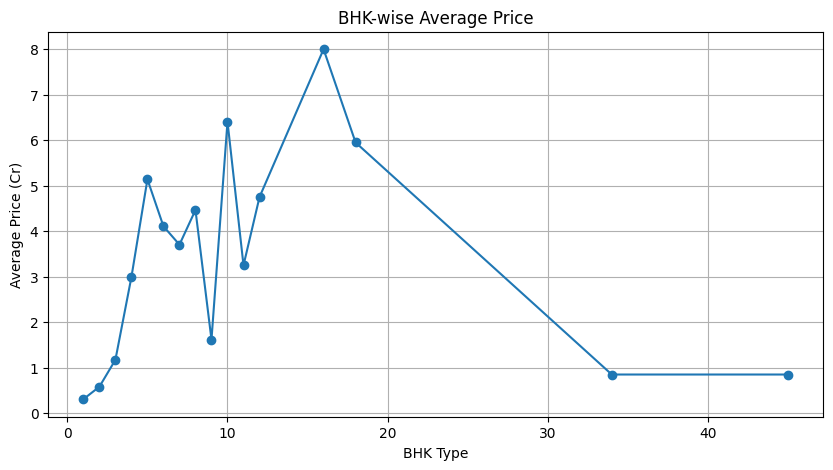

In [46]:
plt.figure(figsize=(10,5))
plt.plot(bhk_avg_price.index, bhk_avg_price.values, marker='o')
plt.xlabel("BHK Type")
plt.ylabel("Average Price (Cr)")
plt.title("BHK-wise Average Price")
plt.grid(True)
plt.show()


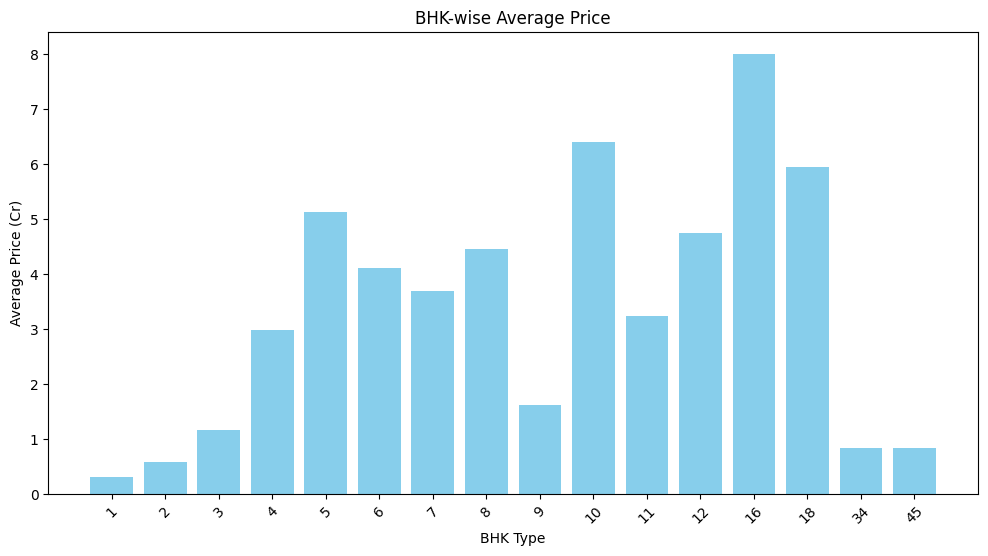

In [47]:
plt.figure(figsize=(12,6))
plt.bar(bhk_avg_price.index.astype(str), bhk_avg_price.values, color='skyblue')
plt.xlabel("BHK Type")
plt.ylabel("Average Price (Cr)")
plt.title("BHK-wise Average Price")
plt.xticks(rotation=45)
plt.show()


In [48]:
def bhk_category(x):
    if x <= 5:
        return 'Normal (1-5 BHK)'
    elif x <= 12:
        return 'Luxury (6-12 BHK)'
    else:
        return 'Ultra Luxury (13+ BHK)'

Super['bhk_category'] = Super['bhk_type'].apply(bhk_category)


C:\Users\ratho\AppData\Local\Temp\ipykernel_5396\1400884943.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Super['bhk_category'] = Super['bhk_type'].apply(bhk_category)


In [49]:
category_price = Super.groupby('bhk_category')['price_in_cr'].sum()
category_count = Super.groupby('bhk_category')['bhk_type'].count()
plot_Super = category_price.reset_index()
plot_Super.columns = ['bhk_category', 'total_price']
plot_Super['count'] = category_count.values
print(plot_Super)


             bhk_category  total_price  count
0       Luxury (6-12 BHK)      422.000    104
1        Normal (1-5 BHK)    16970.325  11783
2  Ultra Luxury (13+ BHK)       22.450      6


In [50]:
bhk_cat = plot_Super["bhk_category"]

In [51]:
bhk_cat

0         Luxury (6-12 BHK)
1          Normal (1-5 BHK)
2    Ultra Luxury (13+ BHK)
Name: bhk_category, dtype: object

In [52]:
bhk_pri = plot_Super["total_price"]

In [53]:
bhk_pri

0      422.000
1    16970.325
2       22.450
Name: total_price, dtype: float64

In [54]:
plot_Super = pd.DataFrame({
    'bhk_category': ['Luxury (6-12 BHK)', 'Normal (1-5 BHK)', 'Ultra Luxury (13+ BHK)'],
    'price_in_crore': [441.38, 17051.72, 22.45]
})

print(plot_Super)

             bhk_category  price_in_crore
0       Luxury (6-12 BHK)          441.38
1        Normal (1-5 BHK)        17051.72
2  Ultra Luxury (13+ BHK)           22.45


C:\Users\ratho\AppData\Local\Temp\ipykernel_5396\1870210738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Total Price per BHK Category')

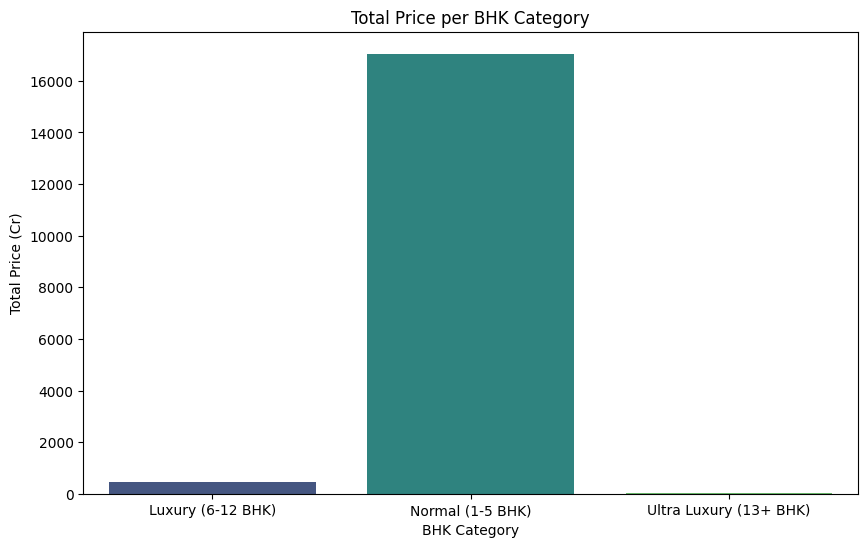

In [55]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=plot_Super,
    x='bhk_category',
    y='price_in_crore',
    palette='viridis'
)
plt.xlabel("BHK Category")
plt.ylabel("Total Price (Cr)")
plt.title("Total Price per BHK Category")

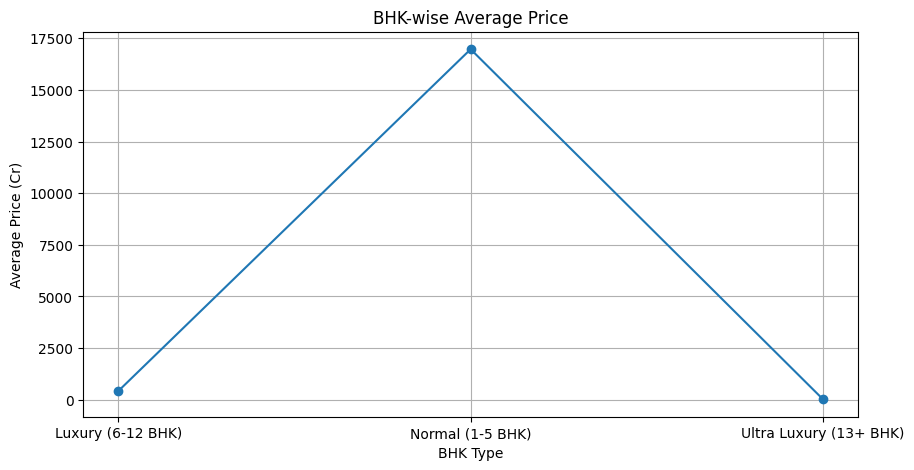

In [56]:
plt.figure(figsize=(10,5))
plt.plot(bhk_cat, bhk_pri, marker='o')
plt.xlabel("BHK Type")
plt.ylabel("Average Price (Cr)")
plt.title("BHK-wise Average Price")
plt.grid(True)
plt.show()

In [57]:
carpet

,location,rate_per_sqft,area_in_sqft,area_type,property_type,bhk_type,price_in_cr
4,"ghatlodia, ahmedabad",6153.0,1604.0,carpet,flat,4,1.62
6,"ghatlodia, ahmedabad",10123.0,978.0,carpet,flat,3,0.99
19,"motera, ahmedabad",8061.0,918.0,carpet,flat,3,0.74
26,ghatlodia,6153.0,1604.0,carpet,flat,4,1.62
27,ghatlodia,10123.0,978.0,carpet,flat,3,0.99
...,...,...,...,...,...,...,...
20038,"inmakarba, sg highway",7155.0,2879.0,carpet,flat,4,2.10
20043,"3, 4",6153.0,2496.0,carpet,flat,4,1.83
20053,"3, 4",7155.0,2879.0,carpet,flat,4,2.10
20056,"insouth bopal, ahmedabad",6153.0,3121.0,carpet,flat,5,4.28


In [58]:
carpet["price_in_cr"].sum()

np.float64(2525.4873)

In [59]:
carpet["bhk_type"].count()

np.int64(2151)

In [60]:
carpet["bhk_type"].unique()

array([ 4,  3,  6,  5,  2,  1,  9,  7,  8, 10])

In [61]:
bhk_avg_price = (
    carpet.groupby('bhk_type')['price_in_cr']
      .mean()
)

print(bhk_avg_price)


bhk_type
1      0.272876
2      0.565230
3      1.027153
4      2.919870
5      4.081596
6      7.142857
7      0.900000
8      0.600000
9      0.650000
10    12.500000
Name: price_in_cr, dtype: float64


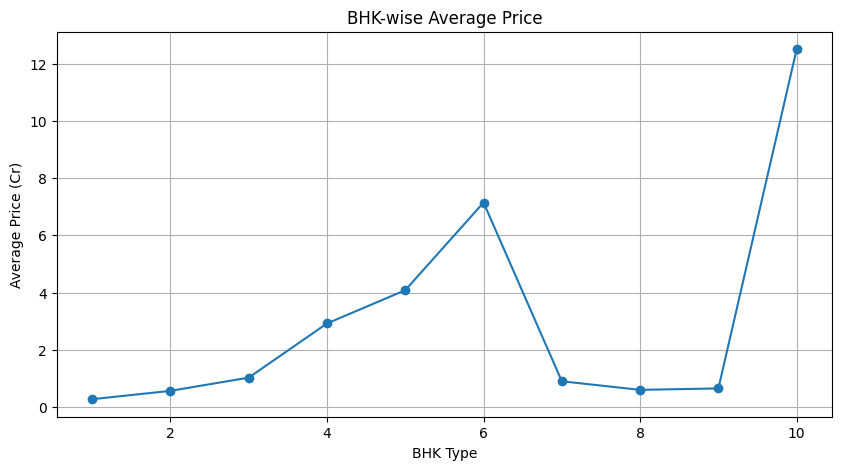

In [62]:
plt.figure(figsize=(10,5))
plt.plot(bhk_avg_price.index, bhk_avg_price.values, marker='o')
plt.xlabel("BHK Type")
plt.ylabel("Average Price (Cr)")
plt.title("BHK-wise Average Price")
plt.grid(True)
plt.show()


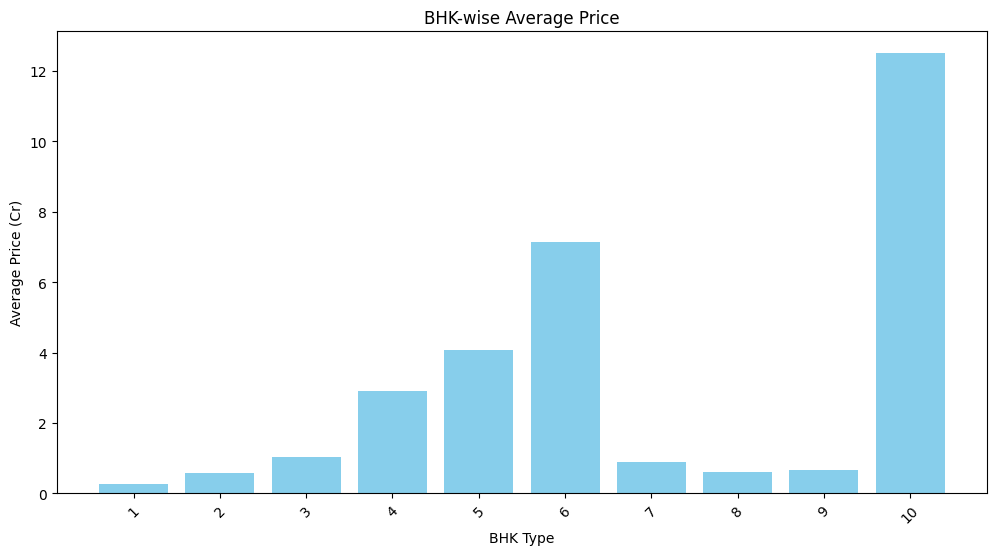

In [63]:
plt.figure(figsize=(12,6))
plt.bar(bhk_avg_price.index.astype(str), bhk_avg_price.values, color='skyblue')
plt.xlabel("BHK Type")
plt.ylabel("Average Price (Cr)")
plt.title("BHK-wise Average Price")
plt.xticks(rotation=45)
plt.show()


In [64]:
def bhk_category(x):
    if x <= 5:
        return 'Normal (1-5 BHK)'
    elif x <= 12:
        return 'Luxury (6-12 BHK)'
    else:
        return 'Ultra Luxury (13+ BHK)'

carpet['bhk_category'] = carpet['bhk_type'].apply(bhk_category)


C:\Users\ratho\AppData\Local\Temp\ipykernel_5396\2336595879.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carpet['bhk_category'] = carpet['bhk_type'].apply(bhk_category)


In [65]:
category_price = carpet.groupby('bhk_category')['price_in_cr'].sum()
category_count = carpet.groupby('bhk_category')['bhk_type'].count()
plot_carpet = category_price.reset_index()
plot_carpet.columns = ['bhk_category', 'total_price']
plot_carpet['count'] = category_count.values
print(plot_carpet)


        bhk_category  total_price  count
0  Luxury (6-12 BHK)      65.5500     12
1   Normal (1-5 BHK)    2459.9373   2139


In [66]:
bhk_cat = plot_carpet["bhk_category"]

In [67]:
bhk_cat

0    Luxury (6-12 BHK)
1     Normal (1-5 BHK)
Name: bhk_category, dtype: object

In [68]:
bhk_pri = plot_carpet["total_price"]

In [69]:
bhk_pri

0      65.5500
1    2459.9373
Name: total_price, dtype: float64

In [70]:
plot_carpet = pd.DataFrame({
    'bhk_category': ['Luxury (6-12 BHK)', 'Normal (1-5 BHK)', 'Ultra Luxury (13+ BHK)'],
    'price_in_crore': [441.38, 17051.72, 22.45]
})

print(plot_carpet)

             bhk_category  price_in_crore
0       Luxury (6-12 BHK)          441.38
1        Normal (1-5 BHK)        17051.72
2  Ultra Luxury (13+ BHK)           22.45


C:\Users\ratho\AppData\Local\Temp\ipykernel_5396\816847511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Total Price per BHK Category')

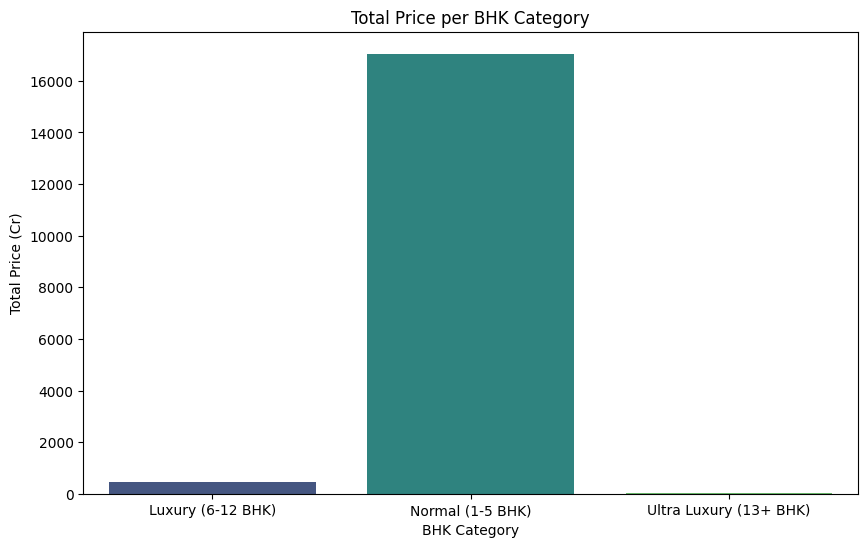

In [71]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=plot_carpet,
    x='bhk_category',
    y='price_in_crore',
    palette='viridis'
)
plt.xlabel("BHK Category")
plt.ylabel("Total Price (Cr)")
plt.title("Total Price per BHK Category")

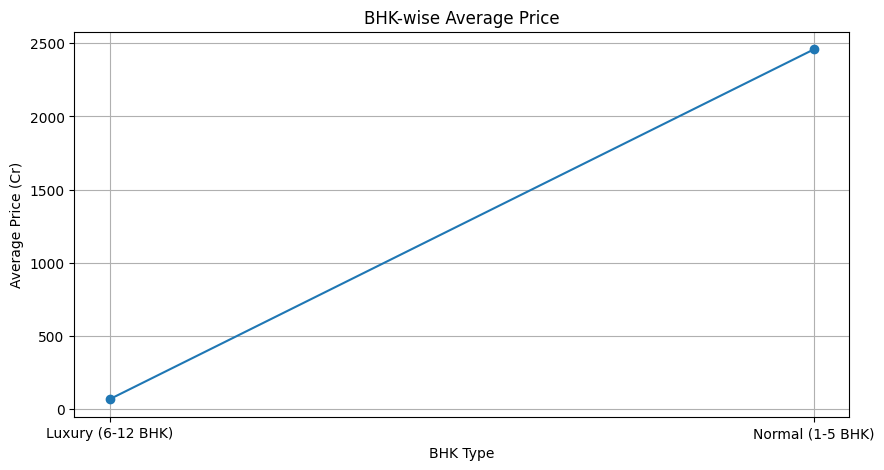

In [72]:
plt.figure(figsize=(10,5))
plt.plot(bhk_cat, bhk_pri, marker='o')
plt.xlabel("BHK Type")
plt.ylabel("Average Price (Cr)")
plt.title("BHK-wise Average Price")
plt.grid(True)
plt.show()

In [73]:
built_up

,location,rate_per_sqft,area_in_sqft,area_type,property_type,bhk_type,price_in_cr
11,"kasindra, ahmedabad",3555.0,3798.0,built-up,house,4,1.35
32,kasindra,3555.0,3798.0,built-up,house,4,1.35
51,vaishnodevi circle,7487.0,3406.0,built-up,flat,5,2.55
55,jan,6153.0,1500.0,built-up,house,2,0.70
65,vasna,10515.0,970.0,built-up,flat,3,1.02
...,...,...,...,...,...,...,...
20000,veer savarkar heights 1,5029.0,855.0,built-up,flat,5,0.85
20003,brahmani society,12698.0,1260.0,built-up,flat,5,0.85
20022,"4, 5",7619.0,10500.0,built-up,house,5,8.00
20041,"inadani shantigram, vaishnodevi circle",7619.0,10500.0,built-up,house,6,8.00


In [74]:
built_up["price_in_cr"].sum()

np.float64(7666.025)

In [75]:
built_up["bhk_type"].count()

np.int64(5170)

In [76]:
built_up["bhk_type"].unique()

array([ 4,  5,  2,  3,  6,  1,  8,  7, 10, 12,  9, 11])

In [77]:
bhk_avg_price = (
    built_up.groupby('bhk_type')['price_in_cr']
      .mean()
)

print(bhk_avg_price)


bhk_type
1      0.336772
2      0.595349
3      1.186554
4      3.274183
5      4.187527
6      3.622037
7      3.716923
8      3.063846
9      1.100000
10     4.414000
11     2.800000
12    10.900000
Name: price_in_cr, dtype: float64


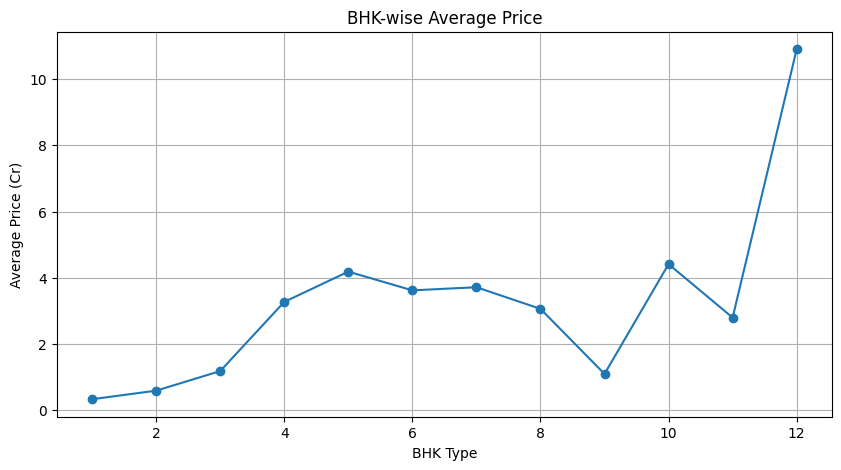

In [78]:
plt.figure(figsize=(10,5))
plt.plot(bhk_avg_price.index, bhk_avg_price.values, marker='o')
plt.xlabel("BHK Type")
plt.ylabel("Average Price (Cr)")
plt.title("BHK-wise Average Price")
plt.grid(True)
plt.show()


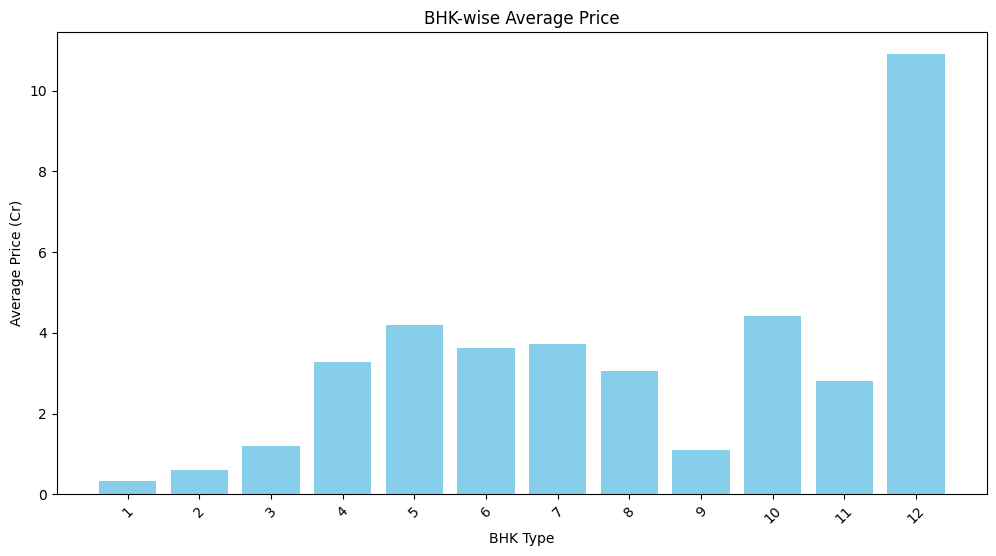

In [79]:
plt.figure(figsize=(12,6))
plt.bar(bhk_avg_price.index.astype(str), bhk_avg_price.values, color='skyblue')
plt.xlabel("BHK Type")
plt.ylabel("Average Price (Cr)")
plt.title("BHK-wise Average Price")
plt.xticks(rotation=45)
plt.show()


In [80]:
def bhk_category(x):
    if x <= 5:
        return 'Normal (1-5 BHK)'
    elif x <= 12:
        return 'Luxury (6-12 BHK)'
    else:
        return 'Ultra Luxury (13+ BHK)'

built_up['bhk_category'] = built_up['bhk_type'].apply(bhk_category)


C:\Users\ratho\AppData\Local\Temp\ipykernel_5396\2202378410.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  built_up['bhk_category'] = built_up['bhk_type'].apply(bhk_category)


In [81]:
category_price = built_up.groupby('bhk_category')['price_in_cr'].sum()
category_count = built_up.groupby('bhk_category')['bhk_type'].count()
plot_built_up = category_price.reset_index()
plot_built_up.columns = ['bhk_category', 'total_price']
plot_built_up['count'] = category_count.values
print(plot_built_up)


        bhk_category  total_price  count
0  Luxury (6-12 BHK)      551.370    150
1   Normal (1-5 BHK)     7114.655   5020


In [82]:
bhk_cat = plot_built_up["bhk_category"]

In [83]:
bhk_cat

0    Luxury (6-12 BHK)
1     Normal (1-5 BHK)
Name: bhk_category, dtype: object

In [84]:
bhk_pri = plot_built_up["total_price"]

In [85]:
bhk_pri

0     551.370
1    7114.655
Name: total_price, dtype: float64

In [86]:
plot_built_up = pd.DataFrame({
    'bhk_category': ['Luxury (6-12 BHK)', 'Normal (1-5 BHK)', 'Ultra Luxury (13+ BHK)'],
    'price_in_crore': [441.38, 17051.72, 22.45]
})

print(plot_built_up)

             bhk_category  price_in_crore
0       Luxury (6-12 BHK)          441.38
1        Normal (1-5 BHK)        17051.72
2  Ultra Luxury (13+ BHK)           22.45


C:\Users\ratho\AppData\Local\Temp\ipykernel_5396\2108578029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Total Price per BHK Category')

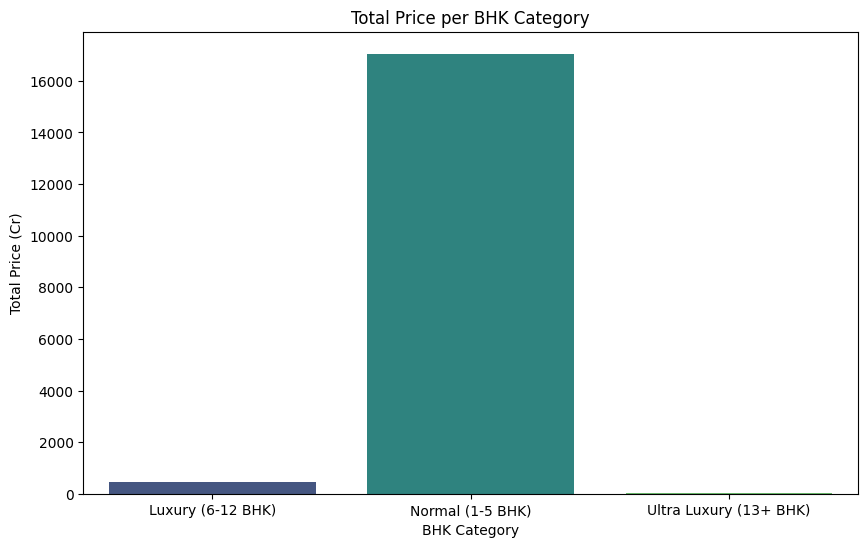

In [87]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=plot_built_up,
    x='bhk_category',
    y='price_in_crore',
    palette='viridis'
)
plt.xlabel("BHK Category")
plt.ylabel("Total Price (Cr)")
plt.title("Total Price per BHK Category")

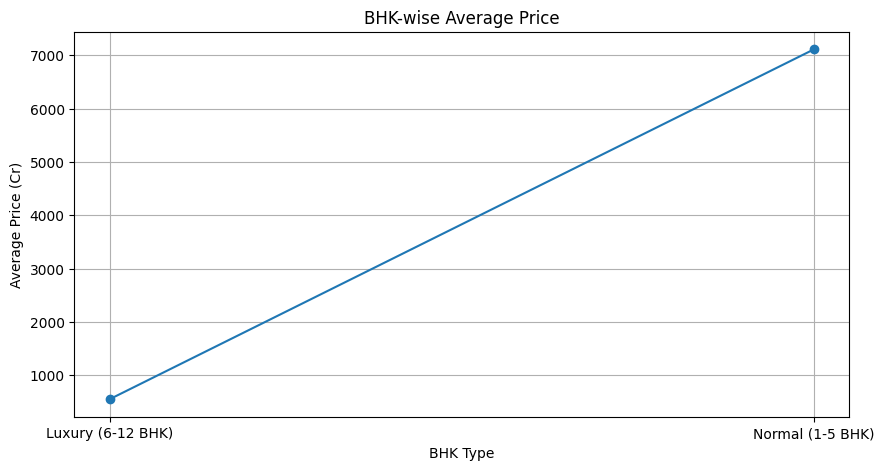

In [88]:
plt.figure(figsize=(10,5))
plt.plot(bhk_cat, bhk_pri, marker='o')
plt.xlabel("BHK Type")
plt.ylabel("Average Price (Cr)")
plt.title("BHK-wise Average Price")
plt.grid(True)
plt.show()

In [89]:
plot

,location,rate_per_sqft,area_in_sqft,area_type,property_type,bhk_type,price_in_cr
132,"c - 24, ami akhand anad - 1",10000.0,1200.0,plot,house,4,1.10
199,"ctm, amraiwadi, ahmedabad, ahmedabad east",14128.0,672.0,plot,land,2,0.95
204,saraswati flate,4600.0,2500.0,plot,land,3,1.15
245,mathrubhumi tenanent nr.dmart,12260.0,1305.0,plot,house,1,1.60
266,"bopal, ahmedabad, ahmedabad west",15833.0,2250.0,plot,land,4,2.85
...,...,...,...,...,...,...,...
19918,"isanpur, ahmedabad, ahmedabad east",8625.0,800.0,plot,flat,2,0.51
19919,"chirag row house, mony hotel road",3517.0,1450.0,plot,house,1,0.85
19922,usmanpuragam,12500.0,1200.0,plot,house,3,1.60
19966,anantara imperial,7926.0,2788.0,plot,flat,4,2.60


In [90]:
plot["price_in_cr"].sum()

np.float64(1789.7975000000001)

In [91]:
plot["bhk_type"].count()

np.int64(846)

In [92]:
plot["bhk_type"].unique()

array([ 4,  2,  3,  1,  5,  6, 10,  7, 11, 12,  9,  8, 17])

In [93]:
bhk_avg_price = (
    plot.groupby('bhk_type')['price_in_cr']
      .mean()
)

print(bhk_avg_price)


bhk_type
1     0.715161
2     1.344702
3     1.562235
4     2.880598
5     3.503854
6     3.727778
7     2.380000
8     1.735714
9     2.250000
10    4.915000
11    2.120000
12    3.850000
17    0.850000
Name: price_in_cr, dtype: float64


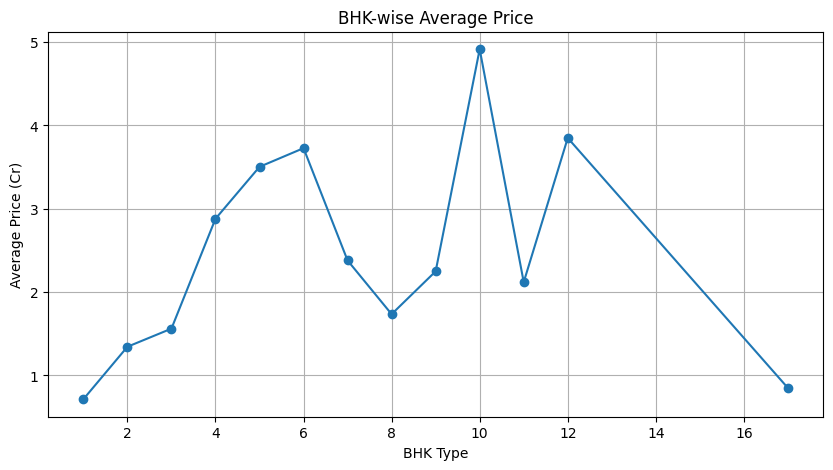

In [94]:
plt.figure(figsize=(10,5))
plt.plot(bhk_avg_price.index, bhk_avg_price.values, marker='o')
plt.xlabel("BHK Type")
plt.ylabel("Average Price (Cr)")
plt.title("BHK-wise Average Price")
plt.grid(True)
plt.show()


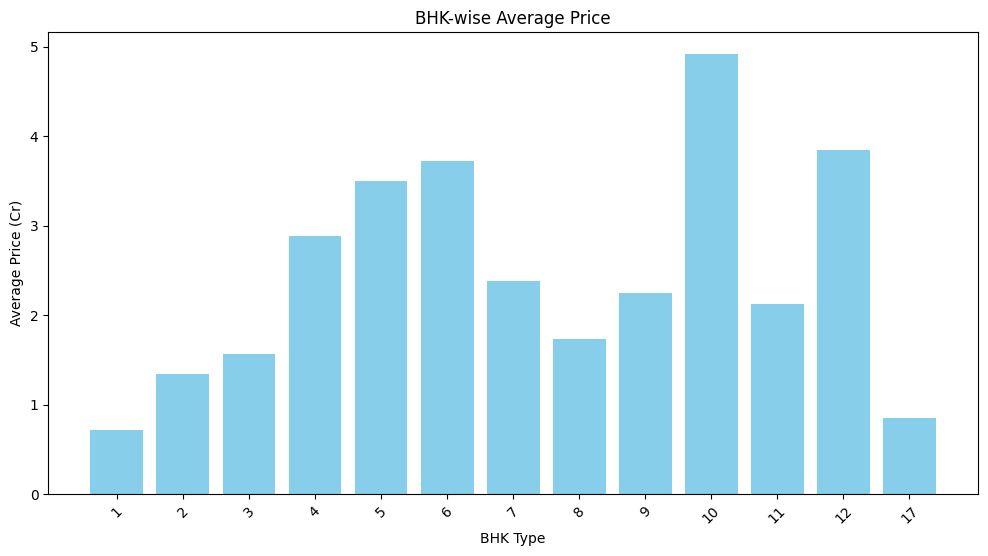

In [95]:
plt.figure(figsize=(12,6))
plt.bar(bhk_avg_price.index.astype(str), bhk_avg_price.values, color='skyblue')
plt.xlabel("BHK Type")
plt.ylabel("Average Price (Cr)")
plt.title("BHK-wise Average Price")
plt.xticks(rotation=45)
plt.show()


In [96]:
def bhk_category(x):
    if x <= 5:
        return 'Normal (1-5 BHK)'
    elif x <= 12:
        return 'Luxury (6-12 BHK)'
    else:
        return 'Ultra Luxury (13+ BHK)'

plot['bhk_category'] = plot['bhk_type'].apply(bhk_category)


C:\Users\ratho\AppData\Local\Temp\ipykernel_5396\2451333567.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot['bhk_category'] = plot['bhk_type'].apply(bhk_category)


In [97]:
category_price = plot.groupby('bhk_category')['price_in_cr'].sum()
category_count = plot.groupby('bhk_category')['bhk_type'].count()
plot_plot = category_price.reset_index()
plot_plot.columns = ['bhk_category', 'total_price']
plot_plot['count'] = category_count.values
print(plot_plot)


             bhk_category  total_price  count
0       Luxury (6-12 BHK)     125.5200     40
1        Normal (1-5 BHK)    1663.4275    805
2  Ultra Luxury (13+ BHK)       0.8500      1


In [98]:
bhk_cat = plot_plot["bhk_category"]

In [99]:
bhk_cat

0         Luxury (6-12 BHK)
1          Normal (1-5 BHK)
2    Ultra Luxury (13+ BHK)
Name: bhk_category, dtype: object

In [100]:
bhk_pri = plot_plot["total_price"]

In [101]:
bhk_pri

0     125.5200
1    1663.4275
2       0.8500
Name: total_price, dtype: float64

In [102]:
plot_plot = pd.DataFrame({
    'bhk_category': ['Luxury (6-12 BHK)', 'Normal (1-5 BHK)', 'Ultra Luxury (13+ BHK)'],
    'price_in_crore': [441.38, 17051.72, 22.45]
})

print(plot_plot)

             bhk_category  price_in_crore
0       Luxury (6-12 BHK)          441.38
1        Normal (1-5 BHK)        17051.72
2  Ultra Luxury (13+ BHK)           22.45


C:\Users\ratho\AppData\Local\Temp\ipykernel_5396\3734345405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Total Price per BHK Category')

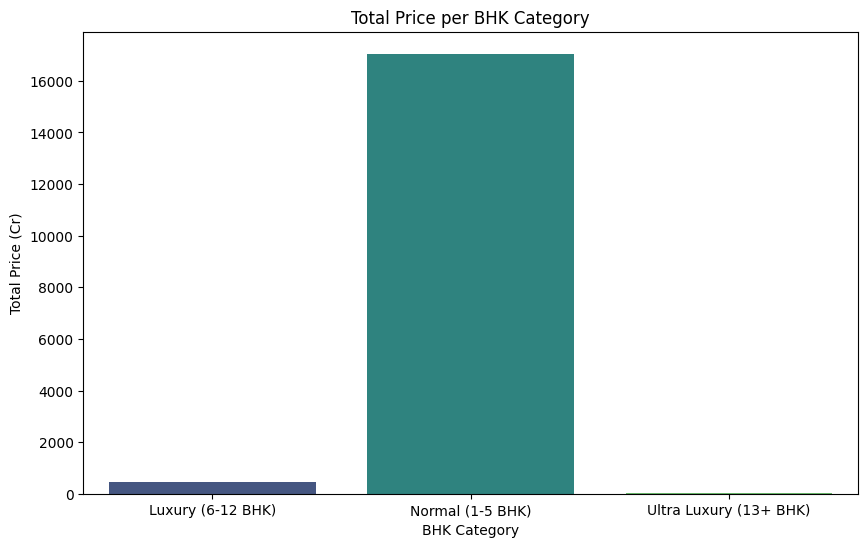

In [103]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=plot_plot,
    x='bhk_category',
    y='price_in_crore',
    palette='viridis'
)
plt.xlabel("BHK Category")
plt.ylabel("Total Price (Cr)")
plt.title("Total Price per BHK Category")

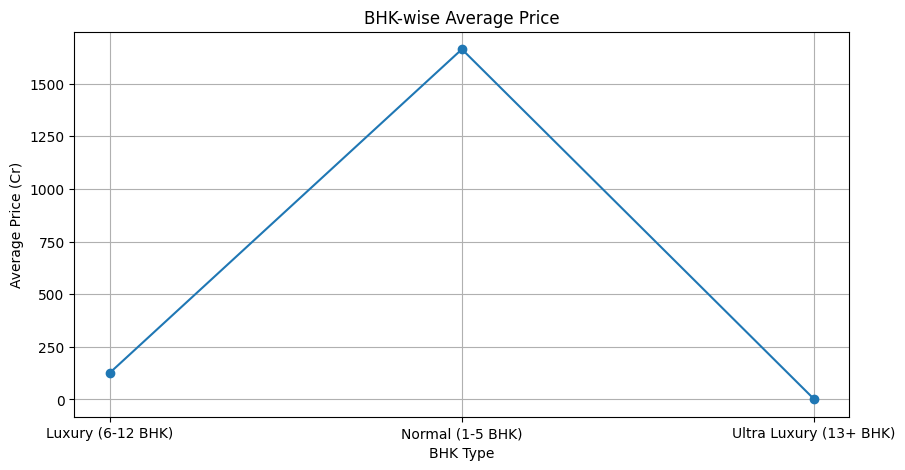

In [104]:
plt.figure(figsize=(10,5))
plt.plot(bhk_cat, bhk_pri, marker='o')
plt.xlabel("BHK Type")
plt.ylabel("Average Price (Cr)")
plt.title("BHK-wise Average Price")
plt.grid(True)
plt.show()